In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


# Números aleatórios

## Prof. Tarcisio F. Maciel, Dr.-Ing., [maciel@ufc.br](mailto:maciel@ufc.br)

## Objetivo
O objetivo desta atividade é conhecer os principais métodos de geração de números pseudoaleatórios e fazer uso dos mesmos em simulações usando Python.

## Observações
1. Todo o código (nomes de variáveis, funções, comentários) em Python deve ser em inglês.
2. No Python, utilize números complexos para representar coordenadas.
3. Procure usar ```numpy``` como base todo o código de modo que o mesmo funcione para escalares e _arrays_.

### Exercício 1

Utilizando os métodos descritos na seção 7.5 do livro _Probability, random variables and stochastic processes_, implemente em Python geradores de números pseudoaleatórios para as seguintes distribuições:
1. Exponencial
2. Rayleigh
3. Laplace
4. Normal, pelo método de Marsaglia
5. Normal, pelo método de Box-Muller
6. Geométrica

In [2]:
#Solução:
import numpy as np
import random as rd
#0
def unif():
    return np.random.rand()
#1
def exponencialRand(LAMBDA):
    u = unif()
    return (-1)*LAMBDA*np.log(1-u)
#2
def rayleighRand():
    u = unif()
    return np.sqrt((-2)*np.log(u))
#3
def laplaceRand():
    u = unif()
    if 0 >= u < 0.5:
        return (-1)*np.log(unif())
    if 0.5 >= u < 1:
        return np.log(unif())
#4
def marsagliaRand():
    u = unif()
    v = unif()
    
    z = np.sqrt((-2)*np.log(v))*np.cos(np.pi*(2*u-1))
    w = np.sqrt((-2)*np.log(v))*np.sin(np.pi*(2*u-1))
    return (z,w)
#5
def boxmRand():
    while True:
        x = 2*unif() - 1
        y = 2*unif() - 1
        q = np.sqrt(x*x + y*y)
        if q <= 1:
            z = (x/q)*np.sqrt((-4)*np.log(q))
            w = (y/q)*np.sqrt((-4)*np.log(q))
            break
    return (z,w)
#6
def geoRand(p):
    r = unif()
    return (np.log(1-r)/np.log(1-p))//1

### Exercício 2
Plote a função densidade de probabilidade (pdf) e a função de distribuição acumulada (cdf) experimentais obtidas a partir dos geradores implementados no item anterior. Contraste os resultados obtidos com as expressões teóricas.

<IPython.core.display.Javascript object>


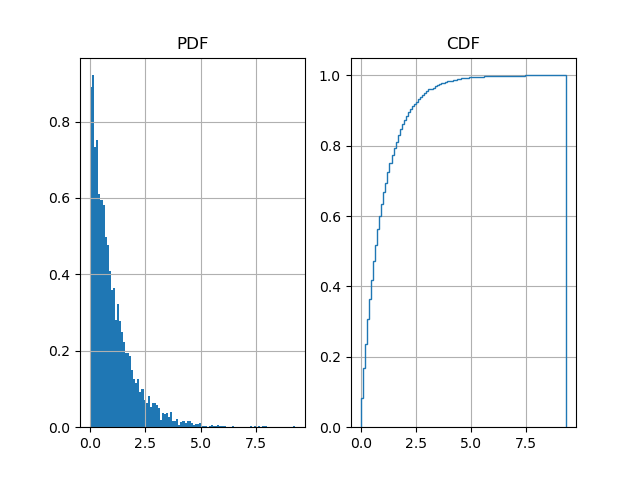

[0.12875968 2.04666885 3.19067994 ... 1.27917912 0.00810521 0.05173564]


In [3]:
#Solução:
import matplotlib.pyplot as plt
#Número de pseudoaleatórios
s = 5000
#Array de pseudoaleatórios
n = np.zeros(s)
#Povoamento do array de pseudoaletórios
for x in range (0, s):
    n[x] = exponencialRand(1)
#Plot CDF e PDF dos pseudoaleatórios
fig,axs = plt.subplots(1,2)
axs[0].hist(n, bins = 100, density = True, stacked=True)
axs[0].set_title('PDF')
axs[0].grid(True)

axs[1].hist(n, bins = 100, density = True, cumulative = True, histtype = 'step')
axs[1].set_title('CDF')
axs[1].grid(True)

print (n)

<IPython.core.display.Javascript object>


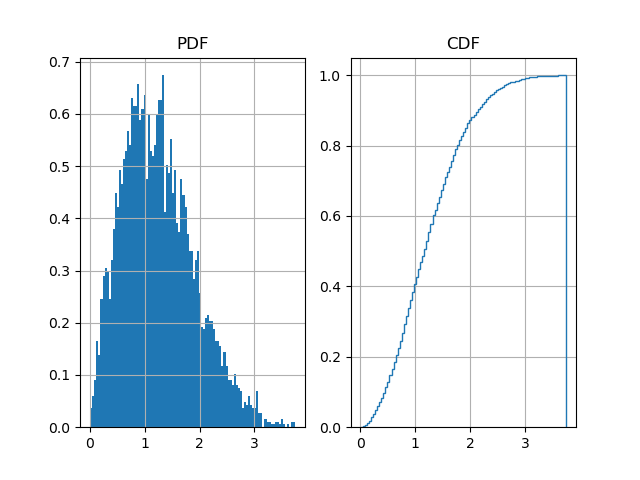

[0.72321312 0.69693476 0.69838731 ... 0.72798693 1.24071363 0.71839154]


In [4]:
import matplotlib.pyplot as plt
#Número de pseudoaleatórios
s = 5000
#Array de pseudoaleatórios
n = np.zeros(s)
#Povoamento do array de pseudoaletórios
for x in range (0, s):
    n[x] = rayleighRand()
#Plot CDF e PDF dos pseudoaleatórios
fig,axs = plt.subplots(1,2)
axs[0].hist(n, bins = 100, density = True, stacked=True)
axs[0].set_title('PDF')
axs[0].grid(True)

axs[1].hist(n, bins = 100, density = True, cumulative = True, histtype = 'step')
axs[1].set_title('CDF')
axs[1].grid(True)

print (n)

<IPython.core.display.Javascript object>


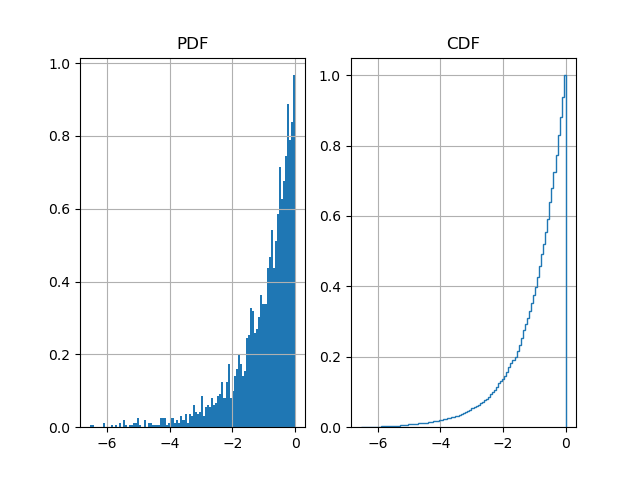

[        nan -0.08015281 -0.20807548 ...         nan         nan
         nan]


In [5]:
import matplotlib.pyplot as plt
#Número de pseudoaleatórios
s = 5000
#Array de pseudoaleatórios
n = np.zeros(s)
#Povoamento do array de pseudoaletórios
for x in range (0, s):
    n[x] = laplaceRand()
#Plot CDF e PDF dos pseudoaleatórios
fig,axs = plt.subplots(1,2)
axs[0].hist(n, bins = 100, density = True, stacked=True)
axs[0].set_title('PDF')
axs[0].grid(True)

axs[1].hist(n, bins = 100, density = True, cumulative = True, histtype = 'step')
axs[1].set_title('CDF')
axs[1].grid(True)

print (n)

<IPython.core.display.Javascript object>


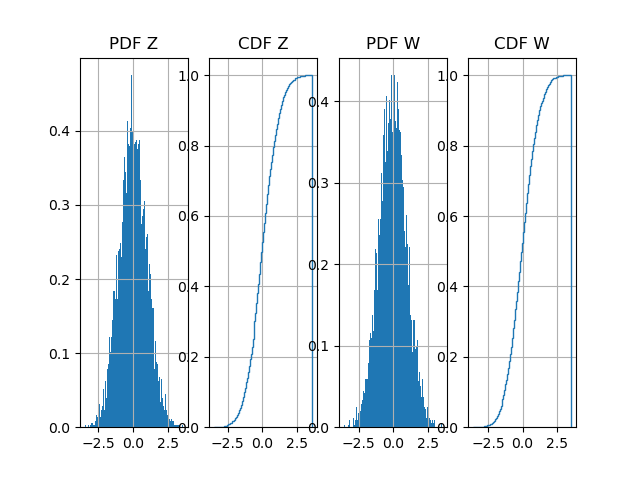

[-0.79653526 -0.65872829 -0.72823963 ... -0.49630604 -1.98518855
  2.18812391]
[ 0.11780613 -1.2687944  -1.50128301 ...  0.22378726 -0.45105327
  0.50564018]


In [6]:
import matplotlib.pyplot as plt
#Número de pseudoaleatórios
s = 5000
#Array de pseudoaleatórios
n = np.zeros(s)
m = np.zeros(s)
#Povoamento do array de pseudoaletórios
for x in range (0, s):
    n[x] = marsagliaRand()[0]
    m[x] = marsagliaRand()[1]
#Plot CDF e PDF dos pseudoaleatórios
fig,axs = plt.subplots(1, 4)
axs[0].hist(n, bins = 100, density = True, stacked=True)
axs[0].set_title('PDF Z')
axs[0].grid(True)

axs[1].hist(n, bins = 100, density = True, cumulative = True, histtype = 'step')
axs[1].set_title('CDF Z')
axs[1].grid(True)

axs[2].hist(m, bins = 100, density = True, stacked=True)
axs[2].set_title('PDF W')
axs[2].grid(True)

axs[3].hist(m, bins = 100, density = True, cumulative = True, histtype = 'step')
axs[3].set_title('CDF W')
axs[3].grid(True)

print (n)
print (m)

<IPython.core.display.Javascript object>


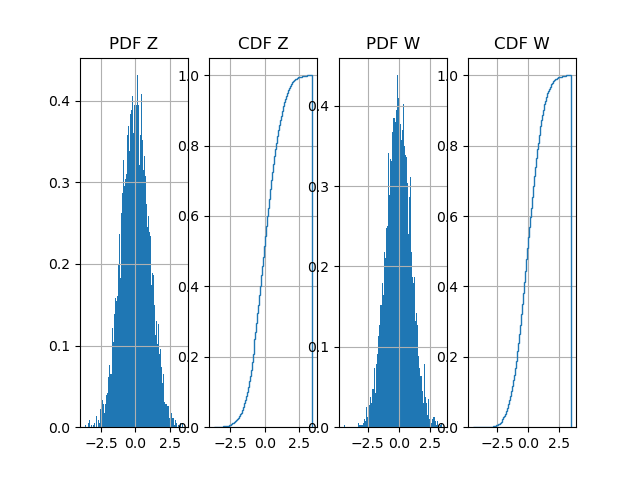

[ 0.03947478  0.43490844  0.48235489 ...  0.15447334  0.45255048
 -0.05211145]
[ 0.35305183 -1.71768416 -0.320053   ...  1.19811824 -1.40913249
  0.40873052]


In [7]:
import matplotlib.pyplot as plt
#Número de pseudoaleatórios
s = 5000
#Array de pseudoaleatórios
n = np.zeros(s)
m = np.zeros(s)
#Povoamento do array de pseudoaletórios
for x in range (0, s):
    n[x] = boxmRand()[0]
    m[x] = boxmRand()[1]
#Plot CDF e PDF dos pseudoaleatórios
fig,axs = plt.subplots(1, 4)
axs[0].hist(n, bins = 100, density = True, stacked=True)
axs[0].set_title('PDF Z')
axs[0].grid(True)

axs[1].hist(n, bins = 100, density = True, cumulative = True, histtype = 'step')
axs[1].set_title('CDF Z')
axs[1].grid(True)

axs[2].hist(m, bins = 100, density = True, stacked=True)
axs[2].set_title('PDF W')
axs[2].grid(True)

axs[3].hist(m, bins = 100, density = True, cumulative = True, histtype = 'step')
axs[3].set_title('CDF W')
axs[3].grid(True)

print (n)
print (m)

<IPython.core.display.Javascript object>


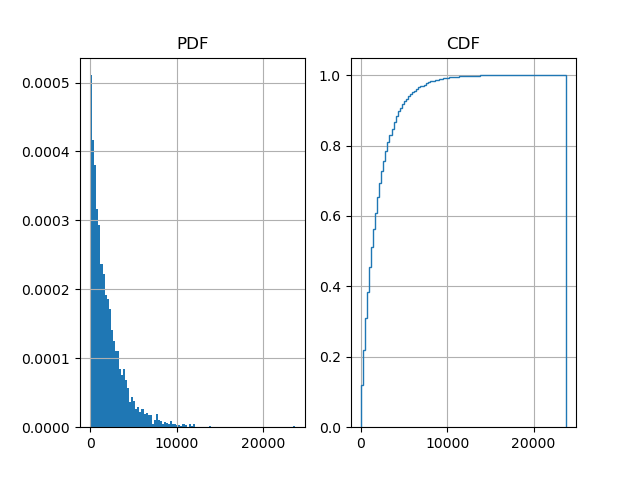

[1740. 5324.  718. ...  140.  222.   26.]


In [8]:
import matplotlib.pyplot as plt
#Número de pseudoaleatórios
s = 5000
#Array de pseudoaleatórios
n = np.zeros(s)
#Povoamento do array de pseudoaletórios
for x in range (0, s):
    n[x] = geoRand(0.0005)
#Plot CDF e PDF dos pseudoaleatórios
fig,axs = plt.subplots(1,2)
axs[0].hist(n, bins = 100, density = True, stacked=True)
axs[0].set_title('PDF')
axs[0].grid(True)

axs[1].hist(n, bins = 100, density = True, cumulative = True, histtype = 'step')
axs[1].set_title('CDF')
axs[1].grid(True)

print (n)

### Exercício 3
Utilizando o método da rejeição, independência entre variáveis aleatórias, variáveis aleatórias com
distribuição uniforme, e transformações sobre variáveis aleatórias, distribua um conjunto de pontos
uniformemente sobre as seguintes regiões:
1. Um quadrado de lado $L$
2. Um círculo de raio $R$
3. Um setor circular de raio $R$ e abertura $\theta$
4. Um anel circular de raio menor $r$ e raio maior $R$
5. Um triângulo equilátero com sua altura alinhada ao eixo $x$
6. Um hexágono regular de raio $R$

<IPython.core.display.Javascript object>


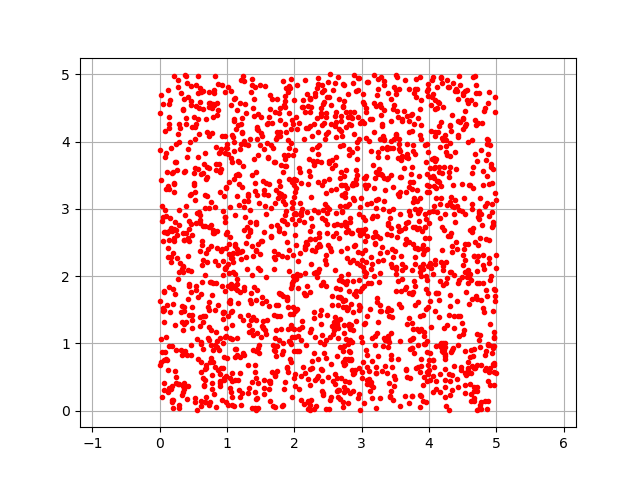

In [9]:
#Solução:
#1
import matplotlib.pyplot as plt
s = 2000
#Posições x e y
x = np.zeros(s)
y = np.zeros(s)
#Lado do quadrado:
l = 5
for n in range (0, s):
    x[n] = l*unif()
    y[n] = l*unif()
    
fig,axs = plt.subplots(1,1)
axs.grid(True)
axs.axis('equal')
axs.plot(x,y,'r.')

<IPython.core.display.Javascript object>


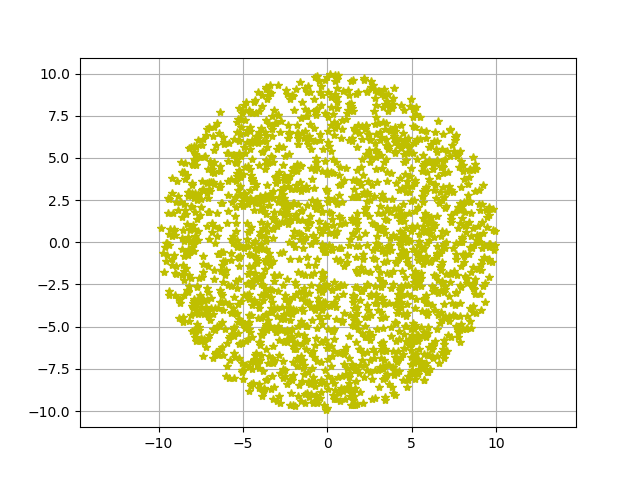

In [10]:
#2
import matplotlib.pyplot as plt
s = 2000
#Posições x e y
x = np.zeros(s)
y = np.zeros(s)
#Raio da circunferência:
r = 10
for n in range (0, s):
    while True:        
        k = r*(2*unif() - 1)
        j = r*(2*unif() - 1)
        z = complex(k,j)
        if np.abs(z) <= r:
            x[n] = k
            y[n] = j
            break
fig,axs = plt.subplots(1,1)
axs.grid(True)
axs.axis('equal')
axs.plot(x,y,'y*')

<IPython.core.display.Javascript object>


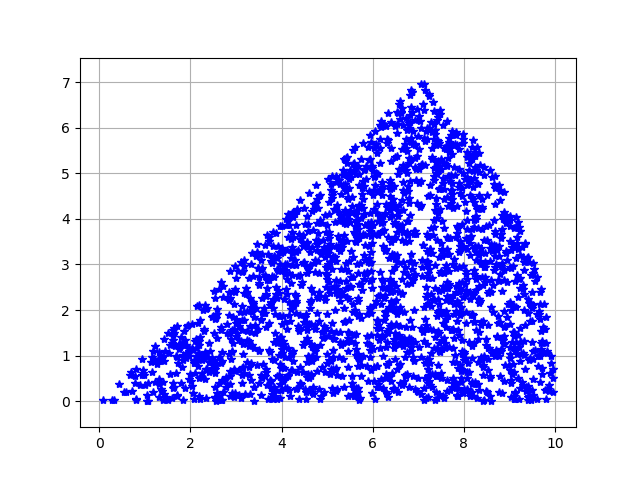

In [11]:
#3
import matplotlib.pyplot as plt
s = 2000
#Posições x e y
x = np.zeros(s)
y = np.zeros(s)
#Raio e abertura do setor circular:
r = 10
a = 45
for n in range (0, s):
    while True:        
        k = r*(2*unif() - 1)
        j = r*(2*unif() - 1)
        aa = np.arctan2(j,k)
        if np.abs(complex(j,k)) <= r and aa < np.radians(a) and aa > 0:
            x[n] = k
            y[n] = j
            break
fig,axs = plt.subplots(1,1)
axs.grid(True)
axs.axis('equal')
axs.plot(x,y,'b*')

<IPython.core.display.Javascript object>


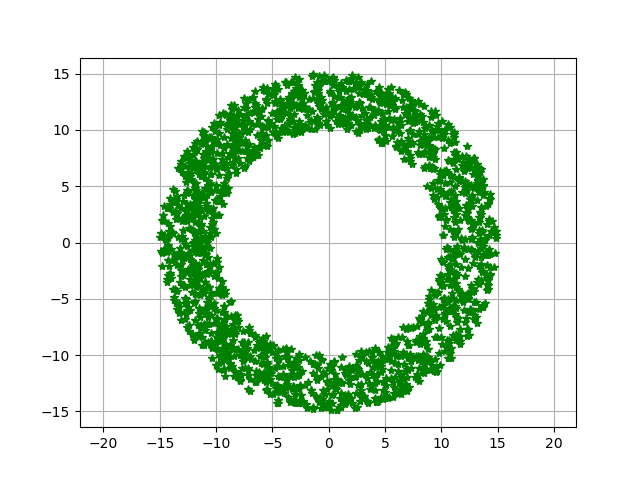

In [12]:
#4
import matplotlib.pyplot as plt
s = 2000
#Posições x e y
x = np.zeros(s)
y = np.zeros(s)
#Raios das circuferência:
r1 = 10
r2 = 15
for n in range (0, s):
    while True:        
        k = r2*(2*unif() - 1)
        j = r2*(2*unif() - 1)
        if np.abs(complex(k,j)) < r2 and np.abs(complex(k,j)) >= r1:
            x[n] = k
            y[n] = j
            break
fig,axs = plt.subplots(1,1)
axs.grid(True)
axs.axis('equal')
axs.plot(x,y,'g*')

<IPython.core.display.Javascript object>


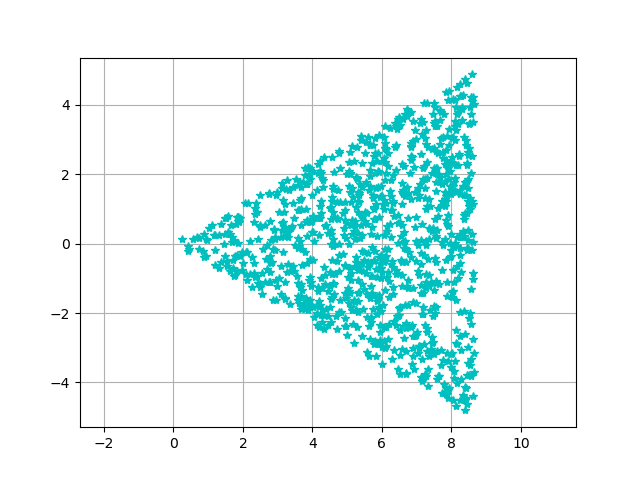

In [13]:
#5
import matplotlib.pyplot as plt
s = 1000
#Posições x e y
x = np.zeros(s)
y = np.zeros(s)
#Altura e lado do triângulo:
h = 8.66
l = 10
hipo = np.abs(complex(h,l/2))
angP = np.arctan2(l/2,h)
angN = np.arctan2(-l/2,h)
for n in range (0, s):
    while True:        
        i = h*(2*unif() - 1)
        j = (l/2)*(2*unif() - 1)
        t = np.arctan2(j,i)
        m = np.abs(complex(i,j))
        if (np.rad2deg(t) <= np.rad2deg(angP) and np.rad2deg(t) >= np.rad2deg(angN)):
            x[n] = i
            y[n] = j
            break
fig,axs = plt.subplots(1,1)
axs.grid(True)
axs.axis('equal')
axs.plot(x,y,'c*')

<IPython.core.display.Javascript object>


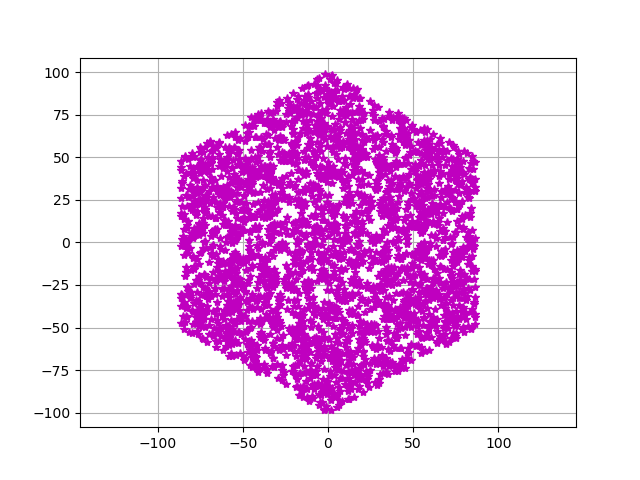

In [14]:
#6
import matplotlib.pyplot as plt
s = 500
#Posições x e y
x = np.zeros(s)
y = np.zeros(s)
#Vetores auxiliares e final
z = np.zeros(s, dtype=complex)
zR60 = np.zeros(s, dtype=complex)
zR120 = np.zeros(s, dtype=complex)
zR180 = np.zeros(s, dtype=complex)
zR240 = np.zeros(s, dtype=complex)
zR300 = np.zeros(s, dtype=complex)
final = np.zeros(6*s, dtype=complex)
#Raio do hexágono:
r = 100
h = (np.sqrt(3)*r)/2
angP = 30
angN = -30
for n in range (0, s):
    while True:        
        i = h*(2*unif() - 1)
        j = (r/2)*(2*unif() - 1)
        t = np.arctan2(j,i)
        m = np.abs(complex(i,j))
        if np.rad2deg(t) <= angP and np.rad2deg(t) >= angN:
            x[n] = i
            y[n] = j
            z[n] = complex(i,j)
            zR60[n] = z[n]*complex(0.5,0.866)
            zR120[n] = z[n]*complex(-0.5,0.866)
            zR180[n] = z[n]*complex(-1,0)
            zR240[n] = z[n]*complex(-0.5,-0.866)
            zR300[n] = z[n]*complex(0.5,-0.866)
            break
final = np.concatenate((z,zR60,zR120,zR180,zR240,zR300),axis=0)
fig,axs = plt.subplots(1,1)
axs.grid(True)
axs.axis('equal')
axs.plot(final.real,final.imag,'m*')

## Referências
1. F. R. P. Cavalcanti, T. F. Maciel, W. da C. Freitas Jr., e Y. C. B. Silva, Comunicação Móvel Celular, 1a ed., LTC, Abril, 2018.
2. A. Papoulis and S. U. Pillai, Probability, random variables and stochastic processes, 4th ed., McGraw-Hill, 2002.